In [2]:
! pip install pythonping
! pip install numpy matplotlib

In [8]:
import pandas as pd # To read & write csv files and use powerful dataframe features
import socket # To get IP addresses of hosts

# To define get_information() function
import urllib.request # To open url of http://ip-api.com/json/
import json # To parse the result of the request
import time # To define a random waiting time to avoid "Too many requests" error
import random #  To define a random waiting time to avoid "Too many requests" error

from pythonping import ping # For RTT measurement
from geopy.distance import geodesic #For distance calculation
from matplotlib import pyplot as plt # To plot
import numpy as np # To use polyfit and other calculations



In [3]:
df_hostnames=pd.read_excel("DebianHostnames.xlsx")

In [4]:
df_hostnames

,Complete List of Mirrors
0,debian.unnoba.edu.ar
1,ftp.am.debian.org
2,mirrors.asnet.am
3,ftp.au.debian.org
4,debian.mirror.digitalpacific.com.au
...,...
328,repo.ialab.dsu.edu
329,debian.repo.cure.edu.uy
330,debian.xtdv.net
331,mirror.bizflycloud.vn


In [5]:
import socket
import pandas as pd


def retrieve_ip(hostname):
    """Resolve hostname to IP address. Returns 'Unknown' if resolution fails."""
    try:
        return socket.gethostbyname(hostname)
    except socket.gaierror:  # More specific exception for address-related errors
        return 'Unknown'


df_hostnames['IP Address'] = df_hostnames['Complete List of Mirrors'].apply(retrieve_ip)

print(df_hostnames)


                Complete List of Mirrors       IP Address
0                   debian.unnoba.edu.ar     200.14.116.3
1                      ftp.am.debian.org   93.187.162.100
2                       mirrors.asnet.am   93.187.162.100
3                      ftp.au.debian.org    103.84.224.37
4    debian.mirror.digitalpacific.com.au     101.0.120.90
..                                   ...              ...
328                   repo.ialab.dsu.edu  138.247.115.248
329              debian.repo.cure.edu.uy     164.73.233.2
330                      debian.xtdv.net  115.165.161.155
331                mirror.bizflycloud.vn  103.107.181.186
332                      mirrors.bkns.vn   103.121.88.254

[333 rows x 2 columns]


In [6]:
df_hostnames.to_excel("HostnameWithIPaddress.xlsx")

In [7]:
df_hostnames_withIP=pd.read_excel("HostnameWithIPaddress.xlsx")

# Initialize columns for Country, City, Latitude, and Longitude with empty values
df_hostnames_withIP['Country'] = None
df_hostnames_withIP['City'] = None
df_hostnames_withIP['Latitude'] = None
df_hostnames_withIP['Longitude'] = None

Getting Location information for IP address, random delay added for avoiding high request 

In [9]:


def get_information(ip):
    delay = random.randint(1, 5)  # Random delay betweeen 1 and 5 seconds
    response = urllib.request.urlopen('http://ip-api.com/json/' + ip)  # Fetch IP information
    info = json.loads(response.read())  # Parse JSON response
    time.sleep(delay)  # Simulate delay
    country = info['country']
    city = info['city']
    latitude = info['lat']
    longitude = info['lon']
    return country, city, latitude, longitude

total_rows = len(df_hostnames_withIP)
print(f"Total rows to process: {total_rows}")

# Iterate through each row in the DataFrame to get IP address information
for index, row in df_hostnames_withIP.iterrows():
    ip = row['IP Address']
    try:
        country, city, latitude, longitude = get_information(ip)
        df_hostnames_withIP.at[index, 'Country'] = country
        df_hostnames_withIP.at[index, 'City'] = city
        df_hostnames_withIP.at[index, 'Latitude'] = latitude
        df_hostnames_withIP.at[index, 'Longitude'] = longitude
        print(f"Processed {index+1}/{total_rows}: {ip} information updated.")
    except Exception as e:
        print(f"Error retrieving information for IP {ip}: {e}")

print("Update complete.")


Total rows to process: 333
Processed 1/333: 200.14.116.3 information updated.
Processed 2/333: 93.187.162.100 information updated.
Processed 3/333: 93.187.162.100 information updated.
Processed 4/333: 103.84.224.37 information updated.
Processed 5/333: 101.0.120.90 information updated.
Processed 6/333: 202.158.214.106 information updated.
Processed 7/333: 122.252.2.42 information updated.
Processed 8/333: 103.1.215.35 information updated.
Processed 9/333: 103.84.224.37 information updated.
Processed 10/333: 139.5.127.195 information updated.
Processed 11/333: 114.141.111.226 information updated.
Processed 12/333: 146.19.0.8 information updated.
Processed 13/333: 213.129.232.18 information updated.
Processed 14/333: 144.208.213.156 information updated.
Processed 15/333: 83.164.133.195 information updated.
Processed 16/333: 89.106.208.14 information updated.
Processed 17/333: 213.129.232.18 information updated.
Processed 18/333: 129.27.3.13 information updated.
Processed 19/333: 46.102.1

Processed 155/333: 185.37.148.245 information updated.
Processed 156/333: 85.94.199.210 information updated.
Processed 157/333: 151.0.128.28 information updated.
Processed 158/333: 90.147.160.70 information updated.
Processed 159/333: 85.94.199.210 information updated.
Processed 160/333: 130.251.19.2 information updated.
Processed 161/333: 140.105.48.55 information updated.
Processed 162/333: 133.5.166.3 information updated.
Processed 163/333: 153.127.75.11 information updated.
Processed 164/333: 192.26.91.193 information updated.
Processed 165/333: 203.178.137.175 information updated.
Processed 166/333: 134.160.38.1 information updated.
Processed 167/333: 45.14.106.5 information updated.
Processed 168/333: 106.178.112.231 information updated.
Processed 169/333: 194.146.42.42 information updated.
Processed 170/333: 195.210.46.141 information updated.
Processed 171/333: 197.155.77.1 information updated.
Processed 172/333: 103.22.220.133 information updated.
Processed 173/333: 103.22.220

Processed 307/333: 140.211.166.134 information updated.
Processed 308/333: 128.135.10.29 information updated.
Processed 309/333: 77.247.126.176 information updated.
Processed 310/333: 173.208.198.91 information updated.
Processed 311/333: 128.153.145.19 information updated.
Processed 312/333: 204.157.3.70 information updated.
Processed 313/333: 161.129.154.250 information updated.
Processed 314/333: 184.105.240.111 information updated.
Processed 315/333: 76.252.192.212 information updated.
Processed 316/333: 216.127.35.166 information updated.
Processed 317/333: 199.223.246.113 information updated.
Processed 318/333: 141.219.188.21 information updated.
Processed 319/333: 162.255.118.133 information updated.
Processed 320/333: 169.229.200.70 information updated.
Processed 321/333: 208.100.4.53 information updated.
Processed 322/333: 69.166.55.80 information updated.
Processed 323/333: 208.80.154.139 information updated.
Processed 324/333: 142.147.88.7 information updated.
Processed 325/

In [17]:
df_hostnames_withIP = df_hostnames_withIP.drop([ 'Unnamed: 0'], axis=1)
df_hostnames_withIP

,Complete List of Mirrors,IP Address,Country,City,Latitude,Longitude
0,debian.unnoba.edu.ar,200.14.116.3,Argentina,Junín,-34.5768,-60.9470
1,ftp.am.debian.org,93.187.162.100,Armenia,Yerevan,40.2047,44.5398
2,mirrors.asnet.am,93.187.162.100,Armenia,Yerevan,40.2047,44.5398
3,ftp.au.debian.org,103.84.224.37,Australia,Sydney,-33.8688,151.2090
4,debian.mirror.digitalpacific.com.au,101.0.120.90,Australia,Sydney,-33.8688,151.2090
...,...,...,...,...,...,...
328,repo.ialab.dsu.edu,138.247.115.248,United States,Madison,44.0100,-97.1146
329,debian.repo.cure.edu.uy,164.73.233.2,Uruguay,Montevideo,-34.9087,-56.1539
330,debian.xtdv.net,115.165.161.155,Vietnam,Hanoi,21.0278,105.8340
331,mirror.bizflycloud.vn,103.107.181.186,Vietnam,Thanh Xuân District,20.9995,105.8070


In [18]:
df_hostnames_withIP.to_excel("df_hostnames_ip_location.xlsx")

In [26]:
df_host_with_loc=pd.read_excel('df_hostnames_ip_location.xlsx')

In [27]:
df_host_with_loc = df_host_with_loc.drop([ 'Unnamed: 0'], axis=1)
df_host_with_loc

,Complete List of Mirrors,IP Address,Country,City,Latitude,Longitude
0,debian.unnoba.edu.ar,200.14.116.3,Argentina,Junín,-34.5768,-60.9470
1,ftp.am.debian.org,93.187.162.100,Armenia,Yerevan,40.2047,44.5398
2,mirrors.asnet.am,93.187.162.100,Armenia,Yerevan,40.2047,44.5398
3,ftp.au.debian.org,103.84.224.37,Australia,Sydney,-33.8688,151.2090
4,debian.mirror.digitalpacific.com.au,101.0.120.90,Australia,Sydney,-33.8688,151.2090
...,...,...,...,...,...,...
328,repo.ialab.dsu.edu,138.247.115.248,United States,Madison,44.0100,-97.1146
329,debian.repo.cure.edu.uy,164.73.233.2,Uruguay,Montevideo,-34.9087,-56.1539
330,debian.xtdv.net,115.165.161.155,Vietnam,Hanoi,21.0278,105.8340
331,mirror.bizflycloud.vn,103.107.181.186,Vietnam,Thanh Xuân District,20.9995,105.8070


In [22]:
api='https://api.ipify.org'
my_ip = urllib.request.urlopen(api).read().decode('UTF-8')
my_country, my_city, my_latitude, my_longitude =  get_information(my_ip)
my_ip, my_country, my_city, my_latitude, my_longitude


('217.82.13.42', 'Germany', 'Munich', 48.0825, 11.5678)

In [23]:
source_dict = {
    "IP": "217.82.13.42",
    "latitude": 48.0825,
    "longitude": 11.5678,
    "city": "Munich",
    "country": "Germany"
}

Function Added for sending ping to host and measuring Round Trip Time in ms

In [29]:
def ping_host_and_update_rtt(row):
    try:
        resp = ping(row["Complete List of Mirrors"], count=1)
        if resp.success:
            rtt_avg_ms = resp.rtt_avg_ms
            print(f"Domain: {row['Complete List of Mirrors']}, RTT: {rtt_avg_ms} ms")
            return rtt_avg_ms
    except Exception as e:
        print(f"Error pinging {row['Complete List of Mirrors']}: {e}")
        return None

    return row['RTT']


df_host_with_loc['RTT'] = df_host_with_loc.apply(lambda row: ping_host_and_update_rtt(row), axis=1)


Domain: debian.unnoba.edu.ar, RTT: 276.06 ms
Domain: ftp.am.debian.org, RTT: 67.58 ms
Domain: mirrors.asnet.am, RTT: 67.73 ms
Domain: ftp.au.debian.org, RTT: 362.19 ms
Domain: debian.mirror.digitalpacific.com.au, RTT: 404.15 ms
Domain: mirror.aarnet.edu.au, RTT: 330.36 ms
Domain: mirror.amaze.com.au, RTT: 280.14 ms
Domain: mirror.gsl.icu, RTT: 416.42 ms
Domain: mirror.linux.org.au, RTT: 393.53 ms
Domain: mirror.overthewire.com.au, RTT: 296.03 ms
Domain: mirror.realcompute.io, RTT: 318.22 ms
Domain: mirrors.xtom.au, RTT: 292.63 ms
Domain: ftp.at.debian.org, RTT: 20.58 ms
Domain: debian.anexia.at, RTT: 20.76 ms
Domain: debian.lagis.at, RTT: 39.83 ms
Domain: debian.mur.at, RTT: 39.0 ms
Domain: debian.sil.at, RTT: 25.64 ms
Domain: ftp.tu-graz.ac.at, RTT: 2000 ms
Domain: mirror.alwyzon.net, RTT: 26.58 ms
Domain: ftp.by.debian.org, RTT: 43.92 ms
Domain: ftp.byfly.by, RTT: 53.69 ms
Domain: mirror.datacenter.by, RTT: 40.34 ms
Domain: ftp.be.debian.org, RTT: 38.23 ms
Domain: ftp.belnet.be, RTT:

Domain: ftp.nc.debian.org, RTT: 375.65 ms
Error pinging debian.nautile.nc: Cannot resolve address "debian.nautile.nc", try verify your DNS or host file
Domain: mirror.lagoon.nc, RTT: 424.0 ms
Domain: ftp.nz.debian.org, RTT: 358.15 ms
Domain: linux.purple-cat.net, RTT: 320.67 ms
Domain: mirror.fsmg.org.nz, RTT: 330.58 ms
Domain: ftp.no.debian.org, RTT: 44.65 ms
Domain: ftp.uio.no, RTT: 50.22 ms
Domain: ftp.pl.debian.org, RTT: 38.82 ms
Domain: debian.inhost.pro, RTT: 46.52 ms
Domain: ftp.agh.edu.pl, RTT: 38.05 ms
Domain: ftp.icm.edu.pl, RTT: 31.38 ms
Domain: ftp.psnc.pl, RTT: 58.85 ms
Domain: ftp.task.gda.pl, RTT: 35.19 ms
Domain: ftp.pt.debian.org, RTT: 26.48 ms
Domain: debian.uevora.pt, RTT: 2000 ms
Domain: ftp.eq.uc.pt, RTT: 2000 ms
Domain: ftp.rnl.tecnico.ulisboa.pt, RTT: 59.29 ms
Domain: mirrors.ptisp.pt, RTT: 57.92 ms
Domain: mirrors.up.pt, RTT: 54.63 ms
Domain: debian.mithril.re, RTT: 287.12 ms
Domain: depot-debian.univ-reunion.fr, RTT: 2000 ms
Domain: mirror.linux.ro, RTT: 36.9 m

In [30]:
df_host_with_loc.to_excel("df_with_RTT.xlsx")

In [33]:
df_with_RTT=pd.read_excel('df_with_RTT.xlsx')
df_with_RTT = df_with_RTT.drop([ 'Unnamed: 0'], axis=1)

df_with_RTT

,Complete List of Mirrors,IP Address,Country,City,Latitude,Longitude,RTT
0,debian.unnoba.edu.ar,200.14.116.3,Argentina,Junín,-34.5768,-60.9470,276.06
1,ftp.am.debian.org,93.187.162.100,Armenia,Yerevan,40.2047,44.5398,67.58
2,mirrors.asnet.am,93.187.162.100,Armenia,Yerevan,40.2047,44.5398,67.73
3,ftp.au.debian.org,103.84.224.37,Australia,Sydney,-33.8688,151.2090,362.19
4,debian.mirror.digitalpacific.com.au,101.0.120.90,Australia,Sydney,-33.8688,151.2090,404.15
...,...,...,...,...,...,...,...
328,repo.ialab.dsu.edu,138.247.115.248,United States,Madison,44.0100,-97.1146,2000.00
329,debian.repo.cure.edu.uy,164.73.233.2,Uruguay,Montevideo,-34.9087,-56.1539,NaN
330,debian.xtdv.net,115.165.161.155,Vietnam,Hanoi,21.0278,105.8340,2000.00
331,mirror.bizflycloud.vn,103.107.181.186,Vietnam,Thanh Xuân District,20.9995,105.8070,334.64


In [34]:
#Drop Outliers 2000ms (timeout) 

df_with_RTT = df_with_RTT[df_with_RTT['RTT'] <= 1999]


Instead of using API, I wrote haversine formula for ease of use and better understanding of the code

In [53]:
import pandas as pd
import numpy as np

# Haversine function definition

def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r



In [54]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_with_RTT_copy = df_with_RTT.copy()

# Apply the haversine function to calculate distances and update the copy
df_with_RTT_copy['Distance'] = df_with_RTT_copy.apply(
    lambda row: haversine(
        source_dict['latitude'], 
        source_dict['longitude'], 
        row['Latitude'], 
        row['Longitude']
    ), 
    axis=1
)
df_with_RTT=df_with_RTT_copy
# Now df_with_RTT_copy contains the 'Distance' column without raising the warning
df_with_RTT

,Complete List of Mirrors,IP Address,Country,City,Latitude,Longitude,RTT,Distance
0,debian.unnoba.edu.ar,200.14.116.3,Argentina,Junín,-34.5768,-60.9470,276.06,11663.595418
1,ftp.am.debian.org,93.187.162.100,Armenia,Yerevan,40.2047,44.5398,67.58,2748.408741
2,mirrors.asnet.am,93.187.162.100,Armenia,Yerevan,40.2047,44.5398,67.73,2748.408741
3,ftp.au.debian.org,103.84.224.37,Australia,Sydney,-33.8688,151.2090,362.19,16330.470852
4,debian.mirror.digitalpacific.com.au,101.0.120.90,Australia,Sydney,-33.8688,151.2090,404.15,16330.470852
...,...,...,...,...,...,...,...,...
325,mirror.us.oneandone.net,74.208.240.17,United States,Philadelphia,39.9557,-75.1698,130.37,6620.041192
326,nyc.mirrors.clouvider.net,94.154.159.241,United States,New York,40.7157,-74.0000,95.58,6489.809928
327,plug-mirror.rcac.purdue.edu,128.211.151.252,United States,West Lafayette,40.4444,-86.9256,139.81,7332.710946
331,mirror.bizflycloud.vn,103.107.181.186,Vietnam,Thanh Xuân District,20.9995,105.8070,334.64,8590.739984


In [55]:
df_with_RTT.describe()

,Latitude,Longitude,RTT,Distance
count,289.000000,289.000000,289.000000,289.000000
mean,38.629516,18.808695,112.588893,3784.202568
std,24.102364,62.890549,121.649323,4607.411932
min,-45.882500,-123.280000,12.810000,9.318209
25%,39.482000,2.352220,31.850000,570.285890
50%,47.387500,12.469000,49.090000,1183.672991
75%,51.300500,28.328700,156.110000,7332.710946
max,64.151400,174.793200,512.170000,18494.110819


Below plot shows number of server per Country and Average RTT and Average Distances to Servers of specific country which allows us to interpret the results in detail it is obvious that far away countries results in higher RTTs

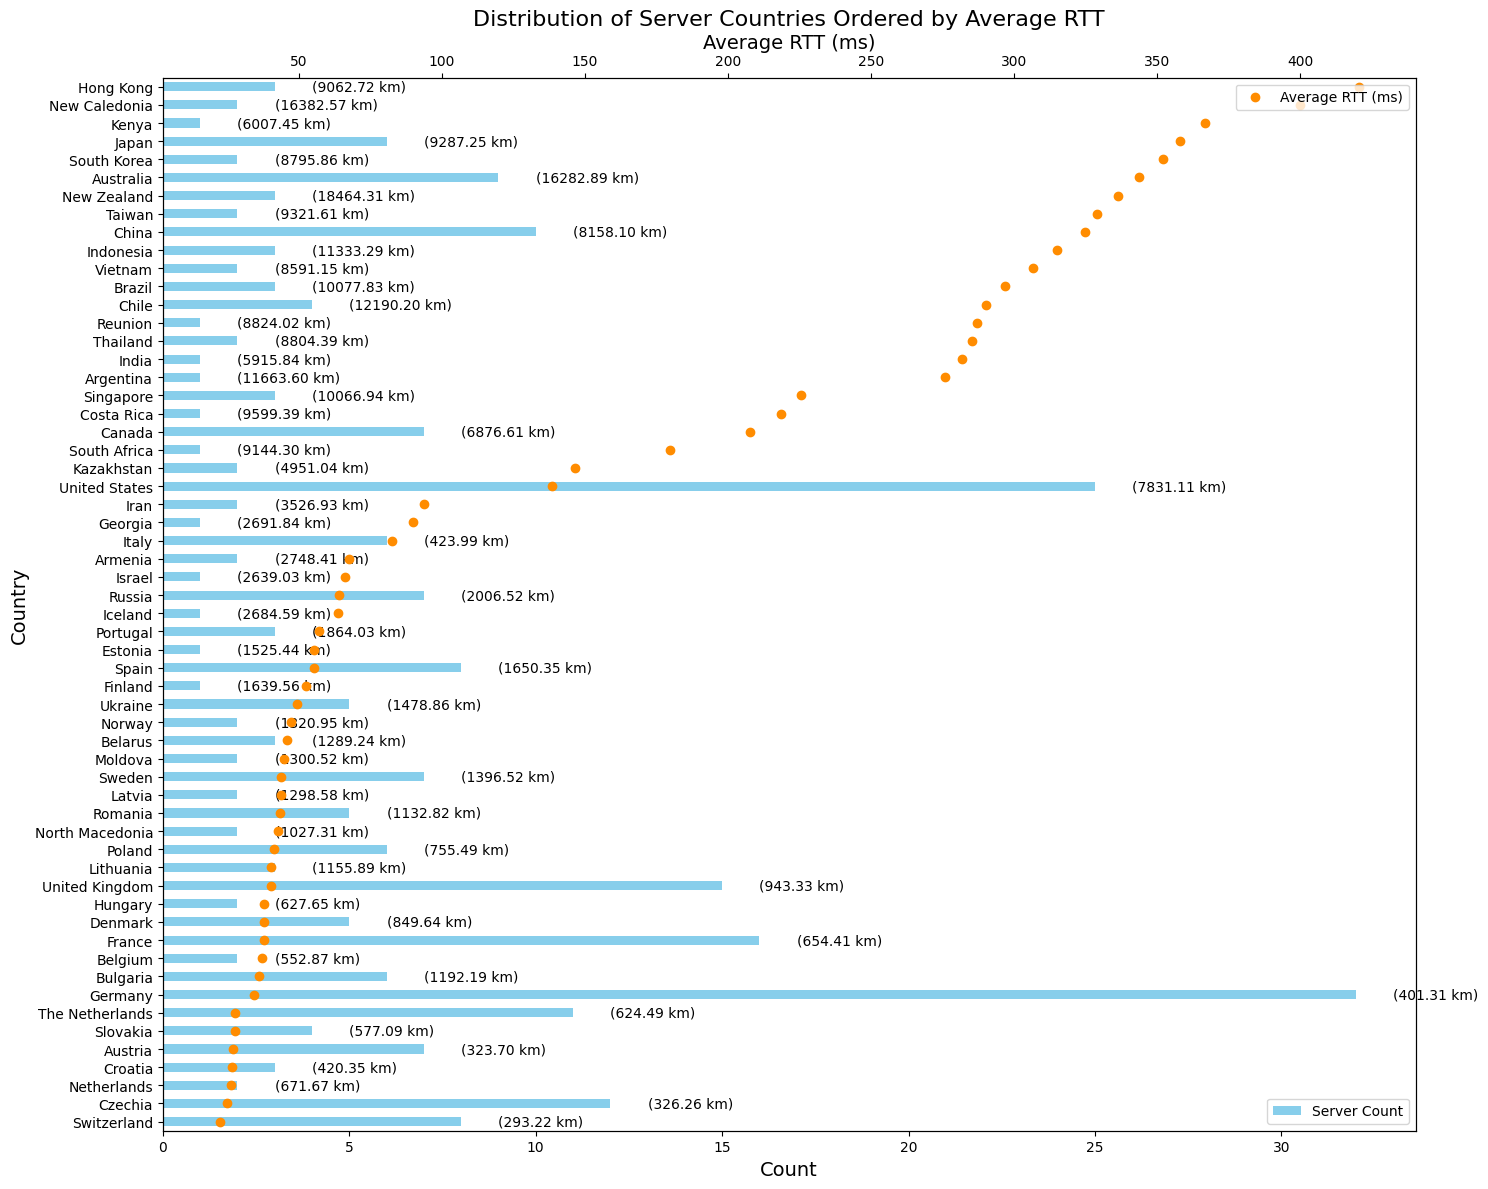

In [58]:

# Calculate the count of servers per country
cn_count = df_with_RTT["Country"].value_counts().rename('Count')

# Calculate the average RTT per country
avg_rtt_per_cn = df_with_RTT.groupby('Country')['RTT'].mean().rename('Average_RTT')

# Calculate the average Distance per country
avg_distance_per_cn = df_with_RTT.groupby('Country')['Distance'].mean().rename('Average_Distance')

# Merge the three Series into a DataFrame on their index (Country names)
merged_df = pd.concat([cn_count, avg_rtt_per_cn, avg_distance_per_cn], axis=1)

# Sort the DataFrame by Average RTT
sorted_df = merged_df.sort_values(by='Average_RTT')

plt.figure(figsize=(15, 12))

ax1 = sorted_df['Count'].plot(kind="barh", color='skyblue', label='Server Count')

for i, (index, row) in enumerate(sorted_df.iterrows()):
    ax1.text(row['Count'] + 1, i, f'({row["Average_Distance"]:.2f} km)', va='center')

ax2 = ax1.twiny()  

for i, (index, row) in enumerate(sorted_df.iterrows()):
    ax2.scatter(row['Average_RTT'], i, color='darkorange', label='Average RTT (ms)' if i == 0 else "")

ax2.set_xlabel("Average RTT (ms)", fontsize=14)  
ax1.set_xlabel("Count", fontsize=14)  
ax1.set_ylabel("Country", fontsize=14)  
plt.title("Distribution of Server Countries Ordered by Average RTT", fontsize=16)  

ax2.set_ylim(ax1.get_ylim())

ax1.legend(loc="lower right")
ax2.legend(loc="upper right")

plt.tight_layout()  
plt.show()


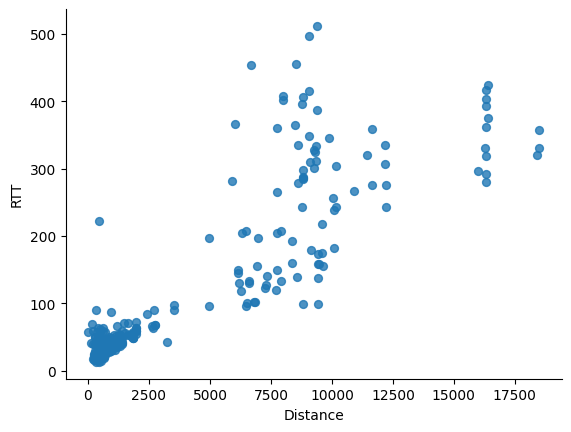

In [60]:
df_with_RTT.plot(kind='scatter', x='Distance', y='RTT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Plot is corrupted from the linear line for servers that has 7500k-10k distances but still linear fit can be suited
We know that the RTT is calculated with the formula of RTT = 2(L/C + d/v) + n the 2(L/C) is the Propagation delay and the 2(d/v) is the transmission delay and n is the variable that we add for other factors like network congestions and etc. Since the Packets travel in the very high speed (speed of light) the L/C time is very small and can be neglected, for example for 10000km distance, this propagation delay is around 0.033ms (since we are using electromagnetic waves). so the majority of our delay comes from the d/v and n. d is the dataframe size and v is the speed of transmission. since the dataframe for all of our packets are the same (we are using ICMP). only thing remaining is tranmission speed, congestions, routing and router delays in between. We think that with higher distance this factors will have a higher penalty.

I conducted this research while time is morning in Europe; average RTT was way less like 0.014 but when I conduct study at night in europe which is almost morning in Asian countries far away countries increases the RTT possibly due to congestion

Average RTT (ms) per km: 0.023057307589677244


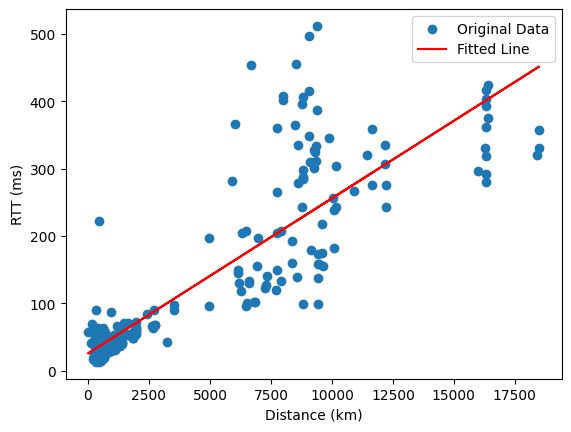

In [61]:
# Fit a linear function using numpy.polyfit
coefficients = np.polyfit(df_with_RTT['Distance'], df_with_RTT['RTT'], deg=1)

# Extract the slope and intercept from the coefficients
slope, intercept = coefficients

# Print the slope (average RTT per km)
print("Average RTT (ms) per km:", slope)

# Plot the original data and the fitted linear function (optional)
plt.scatter(df_with_RTT['Distance'], df_with_RTT['RTT'], label='Original Data')
plt.plot(df_with_RTT['Distance'], slope * df_with_RTT['Distance'] + intercept, color='red', label='Fitted Line')
plt.xlabel('Distance (km)')
plt.ylabel('RTT (ms)')
plt.legend()
plt.show()
